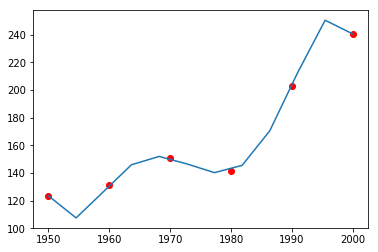

La respuesta es: [151.9465332]


In [4]:
#Interpolacion Polinomica
import matplotlib.pyplot as plt
import numpy as np

def createMatrix(m,n,v):
    C = []
    for i in range(m):
        C.append([v]*n)
    return C

def getDimensions(A):
    return (len(A),len(A[0]))
def copyMatrix(B):
    m,n = getDimensions(B)
    A = createMatrix(m,n,0)
    for i in range(m):
        for j in range(n):
            A[i][j] = B[i][j]
    return A

def sumaMatrix(A,B):
    Am, An = getDimensions(A)
    Bm, Bn = getDimensions(B)
    if Am != Bm or An != Bn:
        print("Error las dimensiones deben ser iguales")
        return []
    C = createMatrix(Am, An, 0)
    for i in range(Am):
        for j in range(An):
            C[i][j] = A[i][j] + B[i][j]
    return C

def restaMatrix(A,B):
    Am, An = getDimensions(A)
    Bm, Bn = getDimensions(B)
    if Am != Bm or An != Bn:
        print("Error las dimensiones deben ser iguales")
        return []
    C = createMatrix(Am, An, 0)
    for i in range(Am):
        for j in range(An):
            C[i][j] = A[i][j] - B[i][j]
    return C

def multMatrix(A,B):
    Am, An = getDimensions(A)
    Bm, Bn = getDimensions(B)
    if An != Bm:
        print("Error las dimensiones deben ser comformabbles")
        return []
    C = createMatrix(Am, Bn, 0)
    for i in range(Am):
        for j in range(Bn):
            for k in range(An):
                    C[i][j] += A[i][k]*B[k][j]
    return C

def getAdyacente(A,r,c):
    Am,An = getDimensions(A)
    C = createMatrix(Am-1,An-1,0)
    for i in range(Am):
        if i == r:
            continue
        for j in range(An):
            if j == c:
                continue
            ci=0
            cj = 0
            if(i < r):
                ci = i
            else:
                ci = i - 1
            if(j < c):
                cj = j
            else:
                cj = j -1
            C[ci][cj] = A[i][j]
    return C

def detMatrix(A):
    m,n = getDimensions(A)
    if m != n:
        print("La matriz no es cuadrada")
        return []
    if m == 1:
        return A[0][0]
    if m == 2:
        return A[0][0]*A[1][1]-A[1][0]*A[0][1]
    det = 0
    for j in range(m):
        det += ((-1)**j)*A[0][j]*detMatrix(getAdyacente(A,0,j))
    return det

def getMatrizTranspuesta(A):
    m,n = getDimensions(A)
    C = createMatrix(n,m,0)
    for i in range(m):
        for j in range(n):
            C[j][i] = A[i][j]
    return C

def getMatrizAdjunta(A):
    m,n = getDimensions(A)
    if m != n:
        print("La matriz no es cuadrada")
        return []
    C = createMatrix(m,n,0)
    for i in range(m):
        for j in range(n):
            C[i][j] = ((-1)**(i+j))*detMatrix(getAdyacente(A,i,j))
    return C

def getMatrizInversa(A):
    m,n = getDimensions(A)
    if m != n:
        print("La matriz no es cuadrada")
        return []
    detA = detMatrix(A)
    if detA== 0:
        print("La matriz no tiene inversa")
        return []
    At = getMatrizTranspuesta(A)
    adjA = getMatrizAdjunta(At)
    invDetA = 1/detA
    C = createMatrix(m,n,0)
    for i in range(m):
        for j in range(n):
            C[i][j]=invDetA*adjA[i][j]
    return C
def evalPolinomio(coef,x):
    y = []
    coef = np.asarray(coef)
    for i in range(len(x)):
        y.append(0)
        for c in range(len(coef)):
            y[i] += (x[i]**c)*coef[c]
    return y

x = [1950,1960,1970,1980,1990,2000]
y = createMatrix(6,1,0)
y[0] = [123.5]
y[1] = [131.2]
y[2] = [150.7]
y[3] = [141.3]
y[4] = [203.2]
y[5] = [240.5]
n= 6
A = createMatrix(n,n,0)
for i in range(n):
    for j in range(n):
        A[i][j] = x[i]**(j)

invA = getMatrizInversa(A)

B = multMatrix(invA,y)

plt.plot(x,y,'ro')
x2 = np.linspace(1950,2000,12)
y2 = evalPolinomio(B,x2)
plt.plot(x2,y2)
plt.show()
print("La respuesta es:", y2[4])

La respuesta es: 151.946768414974


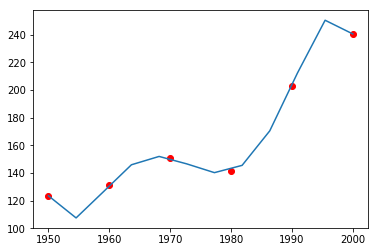

In [5]:
#Metodo Lagrange
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

x = [1950,1960,1970,1980,1990,2000]
y = [123.5,131.2,150.7,141.3,203.2,240.5]

pL = ''

for k in range(len(x)):
    pL += str(y[k])+'* ('
    Lxk = 1
    for j in range(len(x)):
        if (j == k):
            continue
        pL += '(x-%f)*'%(x[j])
        Lxk *= x[k] - x[j]
    pL = pL[:~0] + '/%f) +'%(Lxk)
pL = pL[:~0]
#print(pL)
expr = sympify(pL)
#print(expand(expr))

plt.plot(x,y,'ro')
x2 = np.linspace(1950,2000,12)
y2 = []
x = symbols('x')
for i in range(len(x2)):
    y2.append(expr.subs(x,x2[i]))
plt.plot(x2,y2)
print("La respuesta es:",y2[4])